In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import time


In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))


In [5]:
print("Total samples:", X.shape[0])
print("Image size:", X.shape[1], "x", X.shape[2])
print("Number of features:", X.shape[1] * X.shape[2])
print("Number of classes:", len(np.unique(y)))


Total samples: 70000
Image size: 28 x 28
Number of features: 784
Number of classes: 10


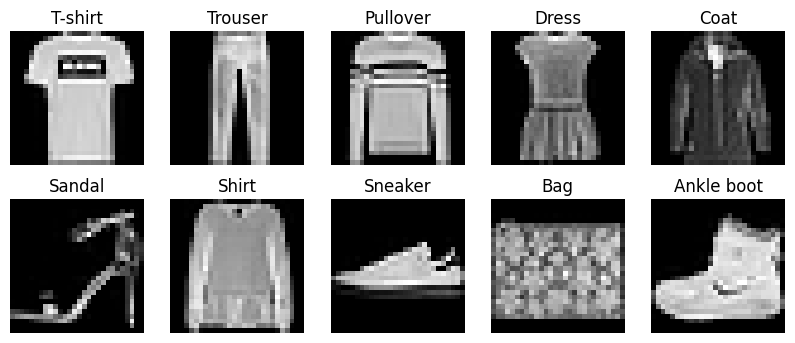

In [6]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,4))
for i in range(10):
    index = np.where(y == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X[index], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()


In [7]:
X_flat = X.reshape(X.shape[0], -1)
print("Shape after flattening:", X_flat.shape)


Shape after flattening: (70000, 784)


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)


In [9]:
memory_mb = X_scaled.nbytes / (1024**2)
print(f"Memory usage: {memory_mb:.2f} MB")


Memory usage: 418.70 MB


In [10]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [11]:
explained_variance = pca.explained_variance_ratio_


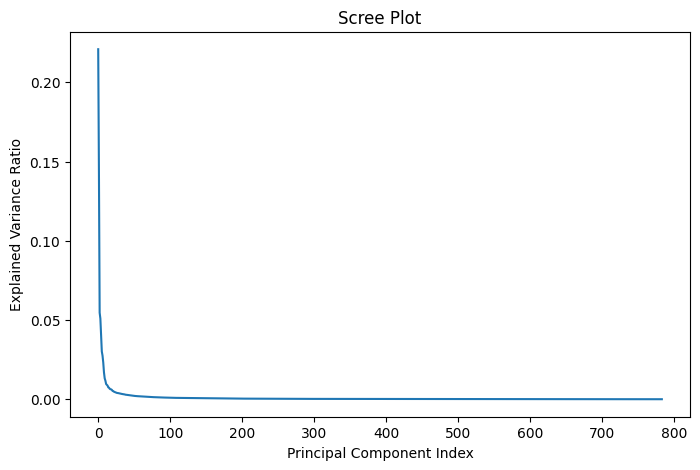

In [12]:
plt.figure(figsize=(8,5))
plt.plot(explained_variance)
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()


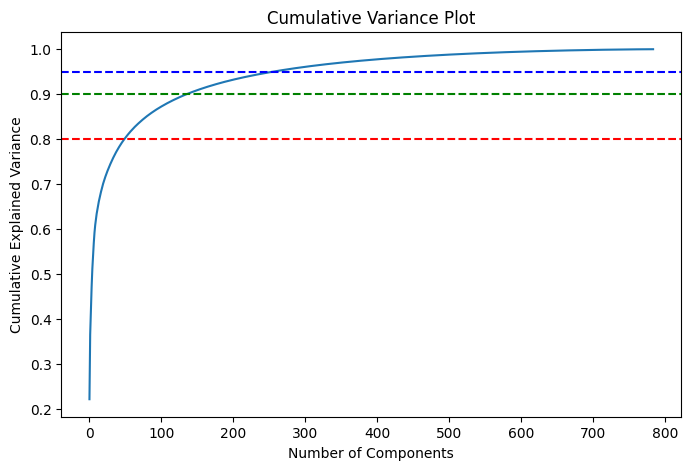

In [13]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance)
plt.axhline(0.80, color='r', linestyle='--')
plt.axhline(0.90, color='g', linestyle='--')
plt.axhline(0.95, color='b', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Plot")
plt.show()


In [14]:
def find_components(threshold):
    return np.argmax(cumulative_variance >= threshold) + 1

k80 = find_components(0.80)
k90 = find_components(0.90)
k95 = find_components(0.95)

k80, k90, k95


(np.int64(50), np.int64(137), np.int64(256))

In [15]:
def reconstruction_error(k):
    pca_k = PCA(n_components=k)
    X_reduced = pca_k.fit_transform(X_scaled)
    X_reconstructed = pca_k.inverse_transform(X_reduced)
    return mean_squared_error(X_scaled, X_reconstructed)

err80 = reconstruction_error(k80)
err90 = reconstruction_error(k90)
err95 = reconstruction_error(k95)

err80, err90, err95


(0.19893023092116274, 0.09939740102050719, 0.04994220374008958)

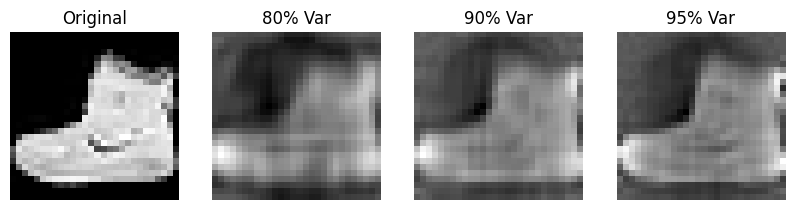

In [16]:
def visualize(index):
    plt.figure(figsize=(10,3))

    plt.subplot(1,4,1)
    plt.imshow(X[index], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    for i, k in enumerate([k80, k90, k95]):
        pca_k = PCA(n_components=k)
        X_rec = pca_k.fit_transform(X_scaled)
        X_rec = pca_k.inverse_transform(X_rec)

        plt.subplot(1,4,i+2)
        plt.imshow(X_rec[index].reshape(28,28), cmap='gray')
        plt.title(f"{[80,90,95][i]}% Var")
        plt.axis('off')

    plt.show()

visualize(0)


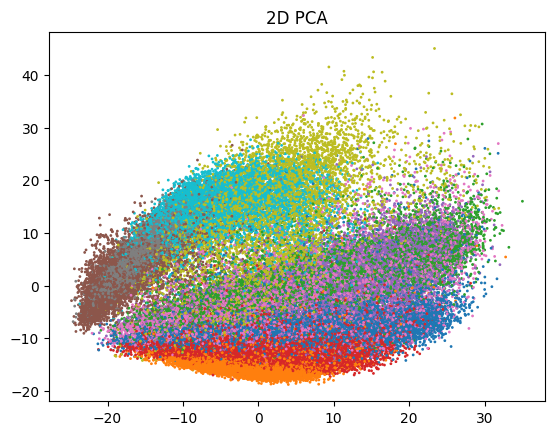

In [17]:
pca2 = PCA(n_components=2)
X_2D = pca2.fit_transform(X_scaled)

plt.scatter(X_2D[:,0], X_2D[:,1], c=y, cmap='tab10', s=1)
plt.title("2D PCA")
plt.show()


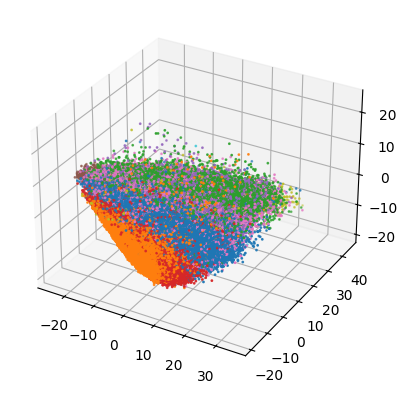

In [18]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_3D = pca3.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:,0], X_3D[:,1], X_3D[:,2], c=y, cmap='tab10', s=1)
plt.show()


In [19]:
start = time.time()
pca.fit(X_scaled)
fit_time = time.time() - start

start = time.time()
pca.inverse_transform(X_pca)
recon_time = time.time() - start

fit_time, recon_time


(1.7805252075195312, 2.5766444206237793)